# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [72]:
# List for holding lat_lngs and cities
lat_lngs = []
raw_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in raw_cities:
        raw_cities.append(city)

# Print the city count to confirm sufficient count
len(raw_cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [74]:
# Initialize the List attributes.
cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# Initialize counters for print log
set_counter = 0;
record_counter = 0;

# Set the units to "imperial" to retrieve temperature in "Fahrenheit" and speed in Mph; units = "metric" would retrieve temperature in "Celsius" meter/sec
units = "imperial"

# Loggers followed by successive API calls for all the cities in the list.
print('Beginning Data Retrieval')
print('-----------------------------')

# raw_cities = ['houston', 'Los Angeles', 'Sushma', 'New York']
for i, city in enumerate(raw_cities):
    
    # set/reset the logger counters 
    if(i % 50 == 0):
        set_counter += 1
        record_counter = 1
        
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    
    # API calls 
    try:
        query_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)

#       append the list elements only for valid cities
        if response.status_code == 200:
            weatherData = response.json()

            cities.append(weatherData['name'])
            lats.append(weatherData['coord']['lat'])
            lngs.append(weatherData['coord']['lon'])
            max_temps.append(weatherData['main']['temp_max'])
            humidities.append(weatherData['main']['humidity'])
            cloudinesses.append(weatherData['clouds']['all'])
            wind_speeds.append(weatherData['wind']['speed'])
            countries.append(weatherData['sys']['country'])
            dates.append(weatherData['dt'])
        else:
            print(f"City {city} not found. Skipping...")

    except e:
        print(f"City {city} not found. Skipping... {e}")
    
    record_counter += 1

#  API Call end logger    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
processing Record 1 of Set 1 | port moresby
processing Record 2 of Set 1 | mataura
processing Record 3 of Set 1 | punta arenas
processing Record 4 of Set 1 | kapaa
processing Record 5 of Set 1 | jamestown
processing Record 6 of Set 1 | avarua
processing Record 7 of Set 1 | vaini
processing Record 8 of Set 1 | roald
processing Record 9 of Set 1 | chagda
City chagda not found. Skipping...
processing Record 10 of Set 1 | nikolskoye
processing Record 11 of Set 1 | bilma
processing Record 12 of Set 1 | cabo san lucas
processing Record 13 of Set 1 | cherskiy
processing Record 14 of Set 1 | lompoc
processing Record 15 of Set 1 | dikson
processing Record 16 of Set 1 | amderma
City amderma not found. Skipping...
processing Record 17 of Set 1 | grand river south east
City grand river south east not found. Skipping...
processing Record 18 of Set 1 | victoria
processing Record 19 of Set 1 | ostrovnoy
processing Record 20 of Set 1 | hasaki
proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
# Convert Raw Data into DataFrame

cityWeatherDF = pd.DataFrame({
    "City": cities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
})

In [92]:
#  Display the DataFrame

cityWeatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Moresby,-9.4431,147.1797,85.42,66,75,11.50,PG,1640927934
1,Mataura,-46.1927,168.8643,68.49,52,98,10.96,NZ,1640927934
2,Punta Arenas,-53.1500,-70.9167,46.51,76,75,9.22,CL,1640927935
3,Kapaa,22.0752,-159.3190,73.38,87,90,1.99,US,1640927935
4,Jamestown,42.0970,-79.2353,42.08,72,90,1.99,US,1640927821


In [93]:
# Validate the record counts
cityWeatherDF.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [175]:
# There are 572 Unique Cities taken for the analysis

cityWeatherDF.nunique()

City          572
Lat           571
Lng           572
Max Temp      542
Humidity       85
Cloudiness     88
Wind Speed    350
Country       116
Date          379
dtype: int64

In [94]:
# Export Data into .csv file
cityWeatherDF.to_csv("../../output_data/city_weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [100]:
# Inspect the data to identify the cities with humidity > 100%

cityWeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.018347,19.004050,50.600542,73.671329,61.047203,7.674178,1.640928e+09
std,33.208437,88.715272,31.701323,20.876847,38.837930,5.997195,1.190207e+02
min,-54.800000,-175.200000,-45.630000,9.000000,0.000000,0.000000,1.640928e+09
25%,-8.155775,-57.587925,31.312500,64.000000,20.000000,3.262500,1.640928e+09
50%,24.013350,23.033400,60.765000,77.000000,76.500000,6.035000,1.640928e+09
75%,49.204175,97.475000,74.475000,91.000000,98.000000,10.480000,1.640928e+09
max,78.218600,179.316700,102.340000,100.000000,100.000000,52.170000,1.640928e+09


#### By looking at the minimum and maximum value of Humidity, we can see the no cities have humidity greater than 100%. So no rows displayed after below filter selection too.

In [101]:
#  Get the indices of cities that have humidity over 100%.
cityWeatherDF.loc[cityWeatherDF['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [106]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityWeatherDF = cityWeatherDF.loc[cityWeatherDF['Humidity'] <= 100]
cleanCityWeatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Moresby,-9.4431,147.1797,85.42,66,75,11.50,PG,1640927934
1,Mataura,-46.1927,168.8643,68.49,52,98,10.96,NZ,1640927934
2,Punta Arenas,-53.1500,-70.9167,46.51,76,75,9.22,CL,1640927935
3,Kapaa,22.0752,-159.3190,73.38,87,90,1.99,US,1640927935
4,Jamestown,42.0970,-79.2353,42.08,72,90,1.99,US,1640927821


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

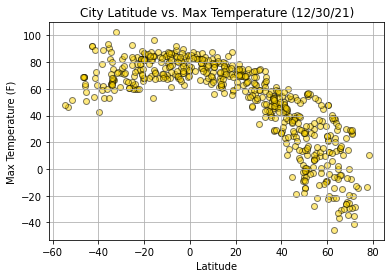

In [133]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Max Temp']

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../../Images/WeatherPy_CityLat_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

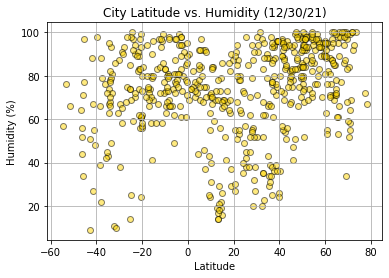

In [135]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Humidity']

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../../Images/WeatherPy_CityLat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

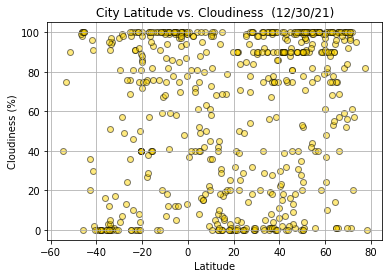

In [136]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Cloudiness']

plt.title(f'City Latitude vs. Cloudiness  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../../Images/WeatherPy_CityLat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

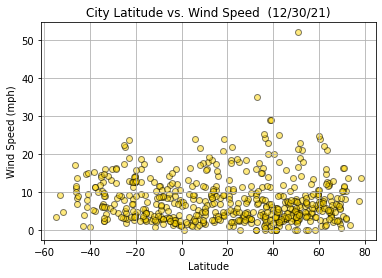

In [137]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Wind Speed']

plt.title(f'City Latitude vs. Wind Speed  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y, color="gold", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../../Images/WeatherPy_CityLat_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [142]:
# Create Northern and Southern Hemisphere DataFrames
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude greater than 0 are considered to be part of Northern Hemisphere,
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

northernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] >= 0)]
northernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Kapaa,22.0752,-159.3190,73.38,87,90,1.99,US,1640927935
4,Jamestown,42.0970,-79.2353,42.08,72,90,1.99,US,1640927821
7,Roald,62.5833,6.1333,37.00,93,90,2.30,NO,1640927937
8,Nikolskoye,59.7035,30.7861,24.69,96,97,10.65,RU,1640927938
9,Bilma,18.6853,12.9164,58.05,37,0,9.13,NE,1640927939


In [143]:
southernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] < 0)]
southernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Moresby,-9.4431,147.1797,85.42,66,75,11.50,PG,1640927934
1,Mataura,-46.1927,168.8643,68.49,52,98,10.96,NZ,1640927934
2,Punta Arenas,-53.1500,-70.9167,46.51,76,75,9.22,CL,1640927935
5,Avarua,-21.2078,-159.7750,78.85,83,8,8.05,CK,1640927710
6,Vaini,-21.2000,-175.2000,82.56,89,75,6.91,TO,1640927937


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7221124537962718


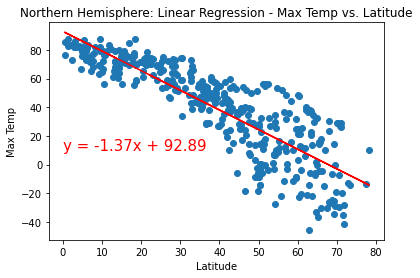

In [158]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot
        
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Linear Regression - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("../../Images/WeatherPy_NorthernHemisphere_Latitude_vs_MaxTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.14650089228290536


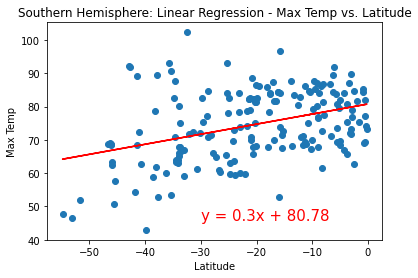

In [157]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot
        
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,46),fontsize=15,color="red")
plt.title("Southern Hemisphere: Linear Regression - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("../../Images/WeatherPy_SouthernHemisphere_Latitude_vs_MaxTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14706721074618526


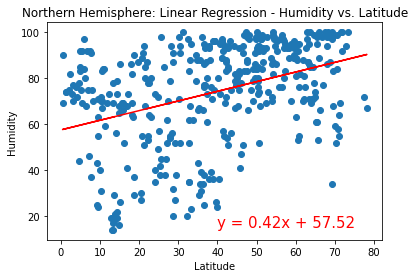

In [160]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot
        
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title("Northern Hemisphere: Linear Regression - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1274034611885743


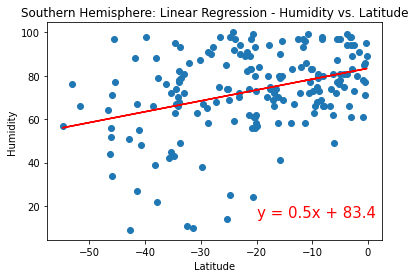

In [163]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot
        
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
plt.title("Southern Hemisphere: Linear Regression - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09275145056581252


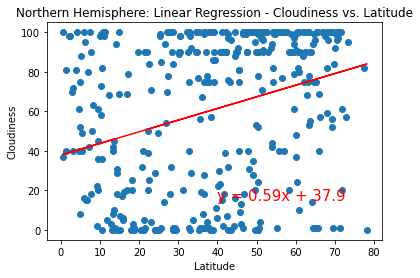

In [171]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot
        
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title("Northern Hemisphere: Linear Regression - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12894274127004499


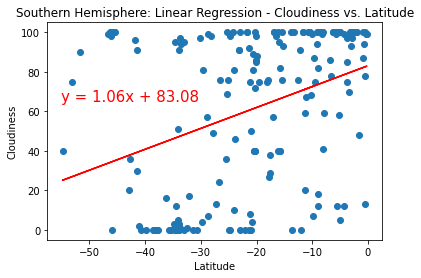

In [168]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot
        
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.title("Southern Hemisphere: Linear Regression - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006827094305013117


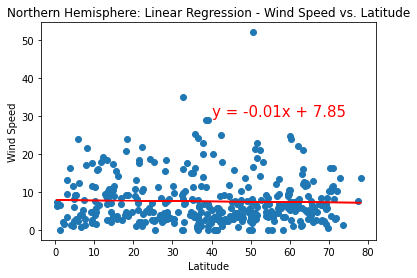

In [173]:
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot
        
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title("Northern Hemisphere: Linear Regression - Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../../Images/WeatherPy_NorthernHemisphere_Latitude_vs_WindSpeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04706677540480559


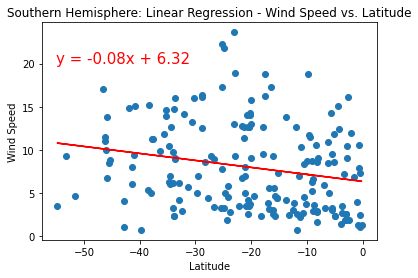

In [170]:
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot
        
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere: Linear Regression - Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../../Images/WeatherPy_SouthernHemisphere_Latitude_vs_WindSpeed.png")
plt.show()